<a href="https://colab.research.google.com/github/ZerihunWaje/ZerihunWaje/blob/main/Mnist_image_processing_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings # to ignore the warning error during
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json #
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

import sample dataset for the test and train

In [22]:
batch_size=128 # the dataset is more than 1million so we fix it to 128
num_classes=10
epochs=2
#the data,split between train and test sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#normalize to 0 to 1 range
x_train/=255
x_test/=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
#convert class vector to binary class metrics
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

60000 train samples
10000 test samples


Checking the dataset if the image is correctly label

Label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


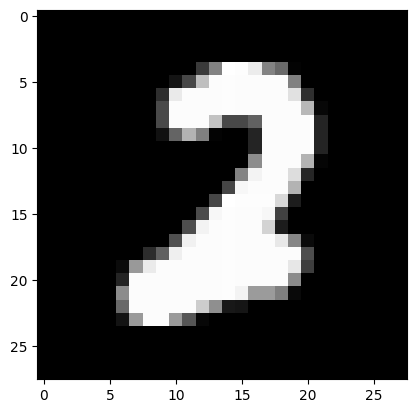

In [23]:
print('Label:',y_test[199:200])
plt.imshow(x_test[199:200].reshape(28,28),cmap='gray')
plt.show()

creating the model

In [24]:
first_layer_size=32# input layer
model=Sequential()
model.add(Dense(first_layer_size,activation='sigmoid',input_shape=(784,))) # all the input into the hidden layer
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(num_classes,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


to check if pattern is the same before it is trained by the model

Shape of First layer (784, 32)
Visualization of first layer


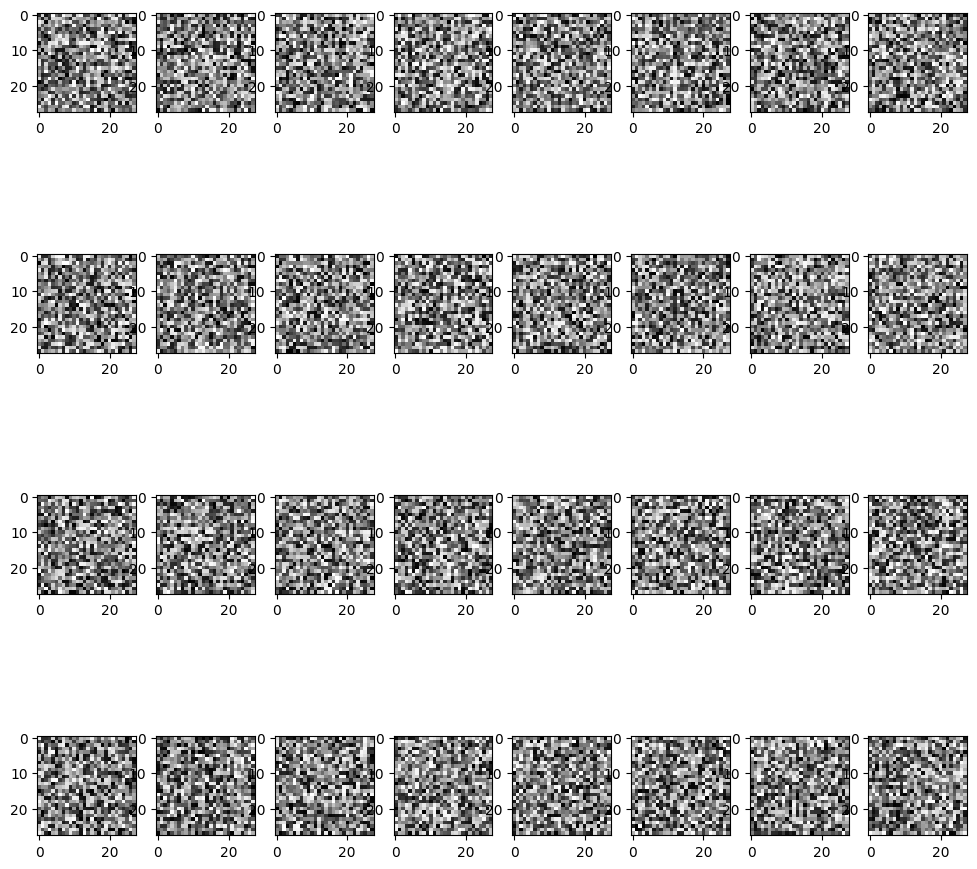

In [26]:
w=[]
for layer in model.layers:
    weights=layer.get_weights()
    w.append(weights)
layer1=np.array(w[0][0])
print("Shape of First layer",layer1.shape)
print("Visualization of first layer")
fig=plt.figure(figsize=(12,12))
columns=8
rows=int(first_layer_size/8)
for i in range(1,columns*rows +1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [30]:
from keras.src.optimizers import optimizer
model.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(),
               metrics=['accuracy'])

In [31]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/2
469/469 [==============================] - 3s 6ms/step - loss: 1.6611 - accuracy: 0.5455
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.6862 - accuracy: 0.8360


In [33]:
#write the testing input and output variables
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test loss:',score[1])

Test loss: 0.47562089562416077
Test loss: 0.8840000033378601


Shape of First layer (784, 32)
Visualization of first layer


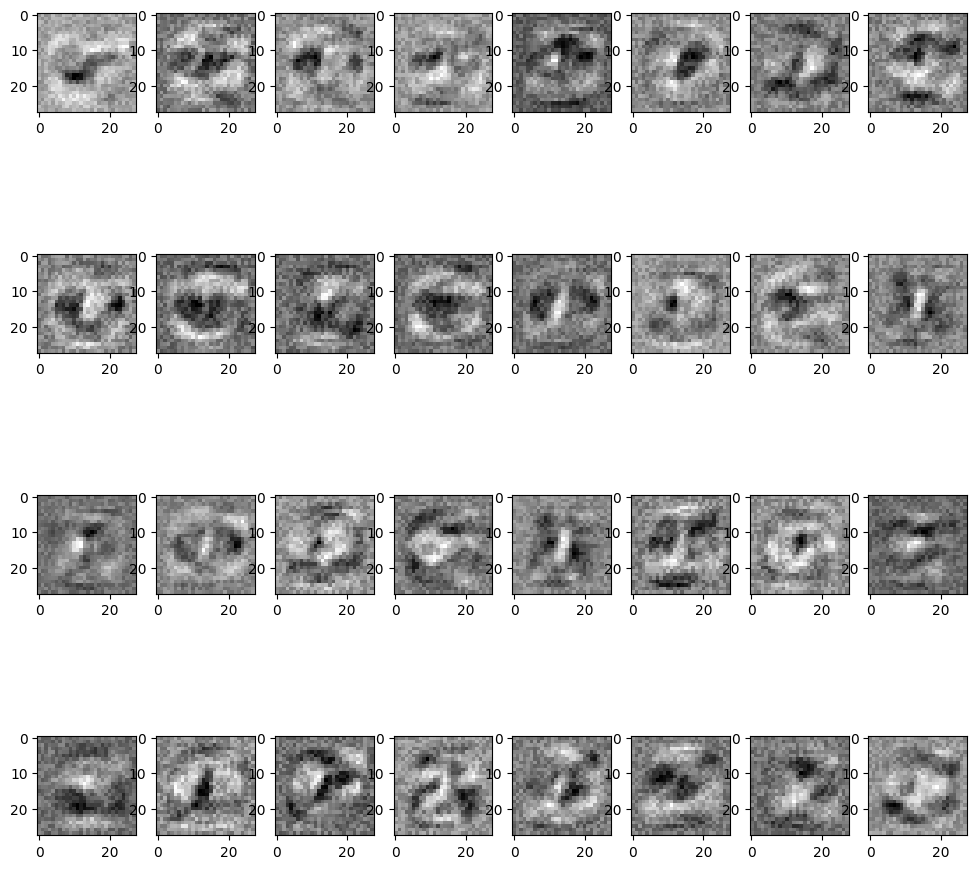

In [40]:
w=[]
for layer in model.layers:
    weights=layer.get_weights()
    w.append(weights)
layer1=np.array(w[0][0])
print("Shape of First layer",layer1.shape)
print("Visualization of first layer")
fig=plt.figure(figsize=(12,12))
columns=8
rows=int(first_layer_size/8)
for i in range(1,columns*rows +1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

Prediction

In [36]:
prediction=model.predict(x_test[23:24])
prediction=prediction[0]
print('prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 22ms/step
prediction
 [2.4199052e-01 1.0053899e-04 1.2580742e-02 3.5964429e-02 1.5784532e-02
 5.8166039e-01 5.7950623e-02 8.0451369e-03 3.1484630e-02 1.4438471e-02]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


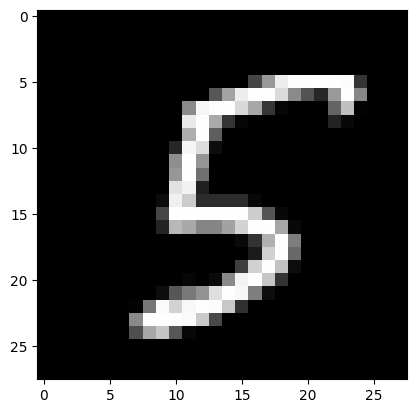

In [37]:
plt.imshow(x_test[23:24].reshape(28,28),cmap='gray')
plt.show()

In [38]:
prediction=model.predict(x_test[199:200])
prediction=prediction[0]
print('prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 26ms/step
prediction
 [7.1173935e-04 2.1645273e-03 8.8292718e-01 4.0835053e-02 7.8060472e-04
 1.3912567e-02 1.4531790e-02 3.4074383e-04 4.3450408e-02 3.4537711e-04]

Thresholded output
 [0 0 1 0 0 0 0 0 0 0]


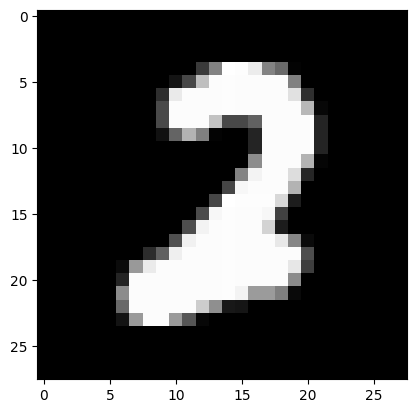

In [39]:
plt.imshow(x_test[199:200].reshape(28,28),cmap='gray')
plt.show()

Testing digit from the google

In [42]:
from google.colab import files
uploaded=files.upload()

Saving digit.jpg to digit.jpg


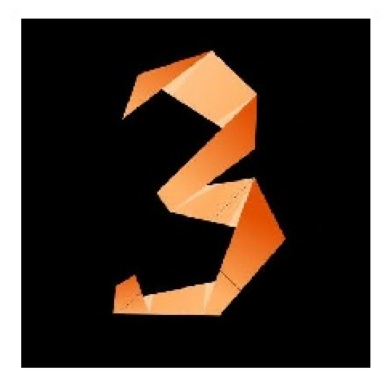

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#load image in color
image_bgr=cv2.imread('digit.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)) # conver BgR to RgB
plt.axis ('off')# turn off tha axis labels and ticks
plt.show()

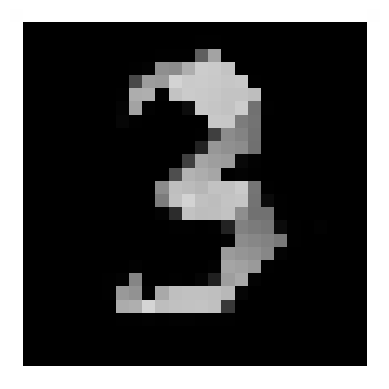

In [45]:
image=cv2.imread('digit.jpg',cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(28,28))
#show  image
plt.imshow(image_resized,cmap='gray'),plt.axis('off')
plt.show()

In [46]:
prediction=model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
threshholded=(prediction>0.5)*1
print('\nThreshholded Score:\n',threshholded[0])
print('\nPredicted Digit:\n',np.where(threshholded==1)[1][0])

1/1 [==============================] - 0s 72ms/step
Prediction Score:
 [3.7951893e-03 2.6969784e-03 4.8143934e-02 8.1298059e-01 2.2031290e-05
 6.7502566e-02 4.1991071e-04 2.3866713e-03 6.1821468e-02 2.3066200e-04]

Threshholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


In [47]:
from google.colab import files
uploaded=files.upload()

Saving digitfiveb.jpg to digitfiveb.jpg


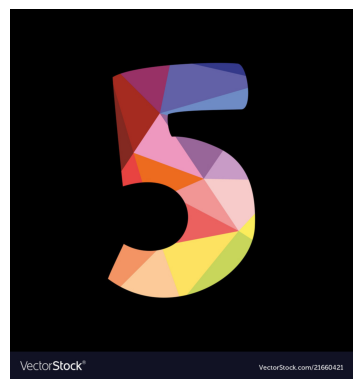

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#load image in color
image_bgr=cv2.imread('digitfiveb.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)) # conver BgR to RgB
plt.axis ('off')# turn off tha axis labels and ticks
plt.show()

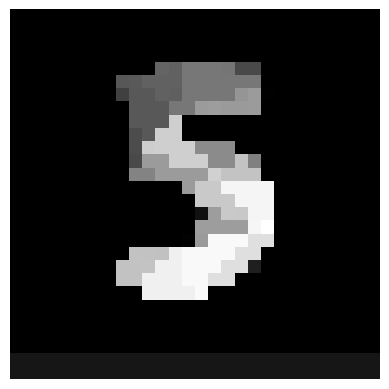

In [49]:
image=cv2.imread('digitfiveb.jpg',cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(28,28))
#show  image
plt.imshow(image_resized,cmap='gray'),plt.axis('off')
plt.show()

In [50]:
prediction=model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
threshholded=(prediction>0.5)*1
print('\nThreshholded Score:\n',threshholded[0])
print('\nPredicted Digit:\n',np.where(threshholded==1)[1][0])

1/1 [==============================] - 0s 24ms/step
Prediction Score:
 [1.5021244e-03 1.5648957e-03 6.9214195e-01 8.8463593e-03 1.8511115e-02
 2.1711044e-02 2.0147301e-01 4.7549669e-04 5.0501559e-02 3.2725506e-03]

Threshholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit:
 2


In [51]:
from google.colab import files
uploaded=files.upload()

Saving digitseven.jpg to digitseven.jpg


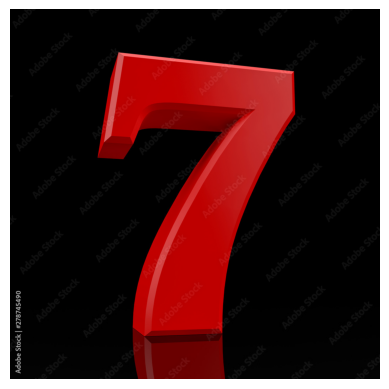

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#load image in color
image_bgr=cv2.imread('digitseven.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)) # conver BgR to RgB
plt.axis ('off')# turn off tha axis labels and ticks
plt.show()

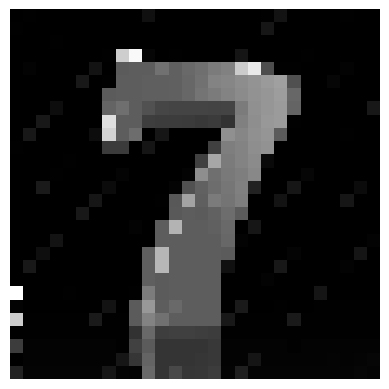

In [54]:
image=cv2.imread('digitseven.jpg',cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(28,28))
#show  image
plt.imshow(image_resized,cmap='gray'),plt.axis('off')
plt.show()

In [55]:
prediction=model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
threshholded=(prediction>0.5)*1
print('\nThreshholded Score:\n',threshholded[0])
print('\nPredicted Digit:\n',np.where(threshholded==1)[1][0])

1/1 [==============================] - 0s 24ms/step
Prediction Score:
 [1.3278344e-03 1.3980859e-02 7.2034724e-02 6.2376630e-01 8.5397398e-05
 5.5703867e-02 4.7638023e-04 3.6881124e-03 2.2809057e-01 8.4599887e-04]

Threshholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


# New Section